Source: https://nbviewer.org/urls/www.numfys.net/media/notebooks/electric_fields_potentials_from_point_charges.ipynb

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

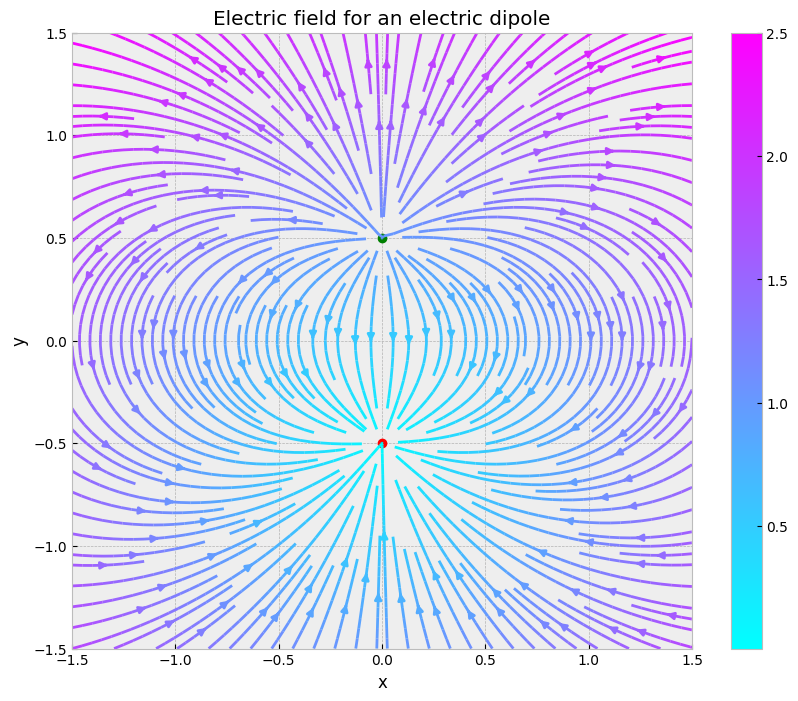

In [2]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

# Define two positive and three negative
# charges (x [m], y [m], q [C])
C = [( 0, 0.5, 1), 
     ( 0, -0.5, -1)]
     #(  0.0, 1.0, -1)] 

[xmin, xmax, ymin, ymax] = [-1.5, 1.5, -1.5, 1.5]
k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

# Plot the point charges
for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'go'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color)
axs.axis([xmin, xmax, ymin, ymax])

# Calculate the field lines
n = 400j  # Mesh grid resolution
Y, X = np.mgrid[xmin:xmax:n, ymin:ymax:n]  # Meshgrid
Ex, Ey = np.array(X*0), np.array(Y*0)
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
    Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R
    
# Plot the result
strm = axs.streamplot(X, Y, Ex, Ey, color = R, density=2., 
               cmap='cool', linewidth=None)
fig.colorbar(strm.lines)
axs.set_title('Electric field for an electric dipole')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#plt.savefig('EDipole.png')

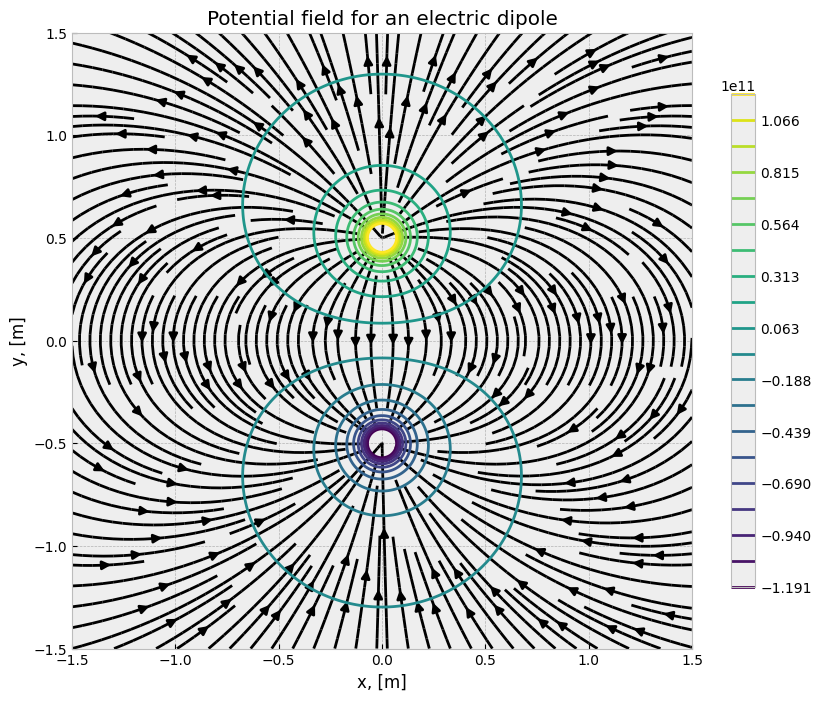

In [3]:
plt.figure(figsize=(10, 8))

V = 0*X

# Calculate the potential
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    V = V + k*C[i][2]/R

# Calculate the electric field from the potential
Ey, Ex = np.gradient(-V)

# The values of the equipotential surfaces. 
# Note that the potential goes to pluss or minus infinite near the point 
# charges. We therefore have to exclude the maximum and minimum values.
equip_surf = np.linspace(np.min(V)*0.05, np.max(V)*0.05, 20)

# Plot the result
plt.streamplot(X, Y, Ex, Ey, color='k', density=2., arrowstyle='simple', cmap='cool')
contour_surf = plt.contour(X, Y, V, equip_surf)
plt.colorbar(contour_surf, shrink=0.8, extend='both')
plt.title('Potential field for an electric dipole')
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.show()
#plt.savefig('VDipole.png', dpi=300)

In [4]:
#def num_particles(n):
#    return  n

#def coordinates(num_particles):
#    main_array = np.ndarray((num_particles, num_particles))
#    return main_array

In [5]:
#C = [(-2, 0, 1), (2,0,-1),
#    (0, -2, -1), (0,2, 1)]

#C_matrix = [[1,2,3],[1,2,3]]
#C = np.ndarray[(-2, 0, 1), (2,0,-1),
#    (0, -2, -1), (0,2, 1)]

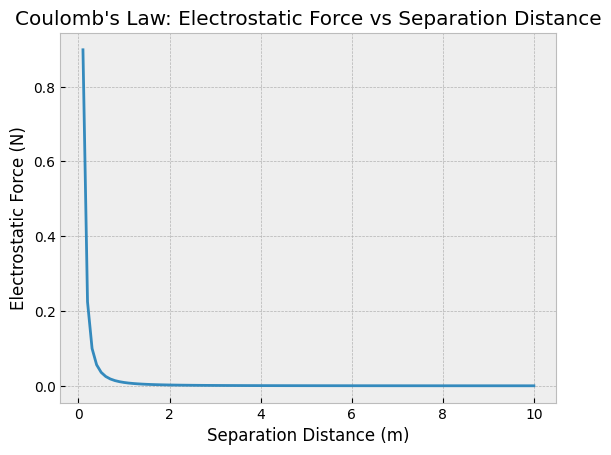

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.9875517873681764e9  # Coulomb constant in N m^2 / C^2

# Define charges (in C) and distance (in m)
q1 = 1.0e-6  # Charge 1 in Coulombs
q2 = -1.0e-6  # Charge 2 in Coulombs
r = np.linspace(0.1, 10, 100)  # Separation distance in meters

# Coulomb's Law
force = k * np.abs(q1 * q2) / r**2

# Plot
plt.figure()
plt.plot(r, force)
plt.xlabel('Separation Distance (m)')
plt.ylabel('Electrostatic Force (N)')
plt.title('Coulomb\'s Law: Electrostatic Force vs Separation Distance')
plt.grid(True)
plt.show()
